In [1]:
import pandas as pd
import numpy as np
import copy

In [2]:
df_train_raw = pd.read_csv("train.csv")
df_test_raw = pd.read_csv("test.csv")

# 파일에서 읽어온 값들을 깊은 복사로 새로 객체를 만들어서 문제가 생기면 코드를 위의 원본데이터를 재활용한다.
df_train = copy.copy(df_train_raw)
df_test = copy.copy(df_test_raw)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head() #survived가 없는 행렬

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#결측치들 찾기 --> 많으면 못써먹음

print("---train set data---")
print(df_train.isnull().sum())
print("데이터 shape :", end='')
print(df_train.shape)
print()


---train set data---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
데이터 shape :(891, 12)



In [6]:
print("---test set data---")
print(df_test.isnull().sum())
print("데이터 shape :", end='')
print(df_test.shape)
print()

---test set data---
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
데이터 shape :(418, 11)



#### age, cabin은 좀;;


### 원핫 => 모든 변수가 관계가 없을 때 새로운 셀을 만들어서 1, 0으로

### 라벨 => 변수가 관계가 서로 있을 때 (원핫이 아니면은) 

In [7]:
df_train = df_train.drop(columns=[ 'Age', 'Cabin'])
df_test = df_test.drop(columns=[ 'Age', 'Cabin'])

In [8]:
df_train = df_train.dropna()
print("---train set data---")
print(df_train.isnull().sum())

print(f"데이터 shape : 행 = {df_train.shape[0]}, 열 = {df_train.shape[1]}")
print()

---train set data---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
데이터 shape : 행 = 889, 열 = 10



In [9]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
print("---test set data---")
print(df_test.isnull().sum())
print("데이터 shape :", end='')
print(df_test.shape)
print()

---test set data---
PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
데이터 shape :(418, 9)



###
1. 데이터 분석
    1. 표로 결과를 만들기
    2. 데이터를 시각화하기
2. 전처리
    1. 결측치제거
    2. 결측치메우기
    3. 라벨인코딩
    4. 원핫인코딩
    5. 표준화
    6. 데이터 선
3. 훈련 
    1. 퍼셉트론
    2. 로지스틱회귀
    3. KNN
    4. SVM
    5. 결정트리
    6. 랜덤포레스트
4. 모델평가
    1. 검증곡선 - 시각화
    2. k곂 교차검증
5. 최적의 파라미터 찾기
   


In [10]:
df_train['Sex'] = df_train['Sex'].apply(lambda x : 1 if x == 'male' else 0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S


In [11]:
df_train['Place_C'] = df_train['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
df_train['Place_Q'] = df_train['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
df_train['Place_S'] = df_train['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
del(df_train['Embarked'])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Place_C,Place_Q,Place_S
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,0,0,1


In [12]:
numeric_df = df_train.select_dtypes(include=["number"])
numeric_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Place_C,Place_Q,Place_S
0,1,0,3,1,1,0,7.2500,0,0,1
1,2,1,1,0,1,0,71.2833,1,0,0
2,3,1,3,0,0,0,7.9250,0,0,1
3,4,1,1,0,1,0,53.1000,0,0,1
4,5,0,3,1,0,0,8.0500,0,0,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = numeric_df.corr()
print(correlation['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.255290
Place_C        0.169966
Parch          0.083151
Place_Q        0.004536
PassengerId   -0.005028
SibSp         -0.034040
Place_S       -0.151777
Pclass        -0.335549
Sex           -0.541585
Name: Survived, dtype: float64


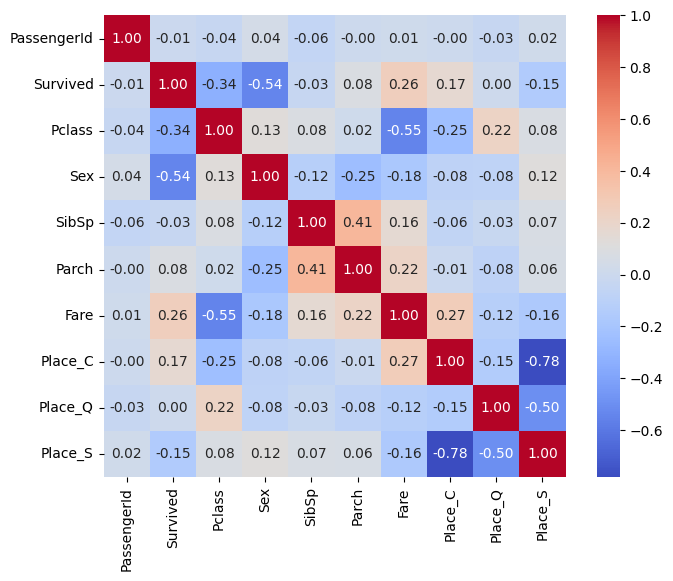

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.metrics import accuracy_score



X = numeric_df.drop("Survived", axis=1)
y = numeric_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train)



y_pred_L = logistic_model.predict(X_test)


accuracy_L = accuracy_score(y_test, y_pred_L)


print(f"Logistic = {accuracy_L}")


Logistic = 0.7808988764044944


/Users/yujin/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
result_df = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived': y_pred_L
})

result_df.to_csv("myPredicted.csv", index=False, columns=['PassengerId', 'Survived'])

In [18]:
print(result_df.shape)
result_df.head()

(178, 2)


,PassengerId,Survived
281,282,0
435,436,1
39,40,1
418,419,0
585,586,1


In [17]:
# Perceptron_model = Perceptron()
# Perceptron_model.fit(X_train, y_train)
# y_pred_P = Perceptron_model.predict(X_test)
# accuracy_P = accuracy_score(y_test, y_pred_P)

# f"Perceptron = {accuracy_P}"